# Statistical Analysis

[This notebook](https://github.com/dattalab/keypoint-moseq/blob/main/docs/source/analysis.ipynb) contains routines for analyzing the output of keypoint-MoSeq.

```{note}
The interactive widgets require jupyterlab launched from the `keypoint_moseq` environment. They will not work properly in jupyter notebook.
```


## Setup

We assume you have already have keypoint-MoSeq outputs that are organized as follows.
```
<project_dir>/               ** current working directory
└── <model_name>/            ** model directory
    ├── results.h5           ** model results
    └── grid_movies/         ** [Optional] grid movies folder
```
Use the code below to enter in your project directory and model name.

In [1]:
import keypoint_moseq as kpms

project_dir='path/to/project' # the full path to the project directory
model_name='model_name' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)


## Assign Groups

The goal of this step is to assign group labels (such as "mutant" or "wildtype") to each recording. These labels are important later for performing group-wise comparisons.
- The code below creates a table called `{project_dir}/index.csv` and launches a widget for editing the table. To use the widget:
    - Click cells in the "group" column and enter new group labels.
    - Hit `Save group info` when you're done.
- **If the widget doesn't appear**, you also edit the table directly in Excel or LibreOffice Calc.

In [7]:
kpms.interactive_group_setting(project_dir, model_name)

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=              ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

## Generate dataframes

Generate a pandas dataframe called `moseq_df` that contains syllable labels and kinematic information for each frame across all the recording sessions. 

In [10]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 
moseq_df

name  centroid_x  \
0       21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...  245.691668   
1       21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...  246.797705   
2       21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...  246.880092   
3       21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...  247.338747   
4       21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...  248.073132   
...                                                   ...         ...   
643906  22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...  217.514933   
643907  22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...  202.928966   
643908  22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...  187.950492   
643909  22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...  173.977080   
643910  22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...  158.353112   

        centroid_y   heading  angular_velocity  velocity_px_s  syllable  \
0       210.796020 -1.217558          0.000000       0.000000         7   
1       208.926666 -1.217558         -0.079308      65.161529         7   
2       208.750297 -1.227725         -0.160751       5.839875         7   
3       206.761270 -1.240335         -0.246197      61.236711         7   
4       205.021514 -1.240335         -0.336099      56.652130         7   
...            ...       ...               ...            ...       ...   
643906  196.355583  0.193480         -0.618441     565.377392        12   
643907  183.149695  0.086206         -0.318911     590.280706        12   
643908  169.656667  0.193808         -0.126241     604.793226        12   
643909  155.679578  0.302726         -0.026824     592.919672        12   
643910  143.198606  0.136897          0.004577     599.912268        12   

        frame_index    group  onset  
0                 0   mutant   True  
1                 1   mutant  False  
2                 2   mutant  False  
3                 3   mutant  False  
4                 4   mutant  False  
...             ...      ...    ...  
643906        53618  default  False  
643907        53619  default  False  
643908        53620  default  False  
643909        53621  default  False  
643910        53622  default  False  

[643911 rows x 10 columns]

Next generate a dataframe called `stats_df` that contains summary statistics for each syllable in each recording session, such as its usage frequency and its distribution of kinematic parameters.

In [4]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df, 
    min_frequency=0.005,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=30)                    # frame rate of the video from which keypoints were inferred

stats_df

group                                               name  syllable  \
0    default  21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...         0   
1    default  21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...         1   
2    default  21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...         2   
3    default  21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...         3   
4    default  21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...         4   
..       ...                                                ...       ...   
163   mutant  22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...        12   
164   mutant  22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...        13   
165   mutant  22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...        14   
166   mutant  22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...        15   
167   mutant  22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...        16   

     heading_mean  heading_std  heading_min  heading_max  \
0       -0.185726     1.675327    -3.141268     3.141216   
1       -0.186075     1.545966    -3.138770     3.141024   
2       -0.270518     1.744452    -3.141173     3.140562   
3        0.300797     1.392815    -3.139225     3.140805   
4        0.004180     1.850509    -3.136158     3.138170   
..            ...          ...          ...          ...   
163     -0.083118     2.002411    -3.127063     3.121900   
164     -0.460300     1.651639    -2.784471     2.309956   
165     -1.045921     2.058440    -3.125407     3.129775   
166     -0.480634     1.747967    -2.962049     2.290607   
167     -1.007293     1.526657    -3.033172     3.117420   

     angular_velocity_mean  angular_velocity_std  angular_velocity_min  \
0                 0.006244              5.969984           -188.391070   
1                -0.047082              9.326394           -188.077053   
2                -0.237998             12.575613           -187.851585   
3                -0.005278             10.043521           -188.285953   
4                 0.292483             13.734939           -188.161345   
..                     ...                   ...                   ...   
163               1.286797             16.501619            -11.525765   
164               0.353800              1.015509             -2.823881   
165              -0.195097             18.098854           -187.265397   
166              -0.912562              1.141117             -2.711569   
167               0.956545             14.582857             -2.738624   

     angular_velocity_max  velocity_px_s_mean  velocity_px_s_std  \
0              188.423102           23.873621          18.251097   
1                3.634033           39.028218          31.174287   
2              188.203382           61.339926          45.208260   
3              188.290531           35.085909          27.308359   
4              188.074944           38.752501          31.086649   
..                    ...                 ...                ...   
163            186.041027           54.491124          35.084645   
164              4.302075           41.289938          28.827368   
165            184.470467           29.156940          16.905312   
166              2.690855           38.201989          19.694319   
167            186.765689           39.685048          27.693812   

     velocity_px_s_min  velocity_px_s_max  frequency  duration  
0             0.052929         250.661913   0.193452  1.278718  
1             0.688662         216.440283   0.113839  0.884532  
2             0.699143         249.923269   0.130208  0.846095  
3             0.488694         234.898832   0.112351  1.552759  
4             0.536752         204.338343   0.068452  1.219203  
..                 ...                ...        ...       ...  
163           1.652698         219.963610   0.020379  0.280460  
164           1.202097         199.331569   0.011244  0.675000  
165           0.490859          93.623653   0.010541  0.473333  
166  

### **Optional:** Save dataframes to csv
Uncomment the code below to save the dataframes as .csv files

In [ ]:
# import os

# # save moseq_df
# save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
# moseq_df.to_csv(os.path.join(save_dir, 'moseq_df.csv'), index=False)
# print('Saved `moseq_df` dataframe to', save_dir)

# # save stats_df
# save_dir = os.path.join(project_dir, model_name)
# stats_df.to_csv(os.path.join(save_dir, 'stats_df'), index=False)
# print('Saved `stats_df` dataframe to', save_dir)

##  Label syllables

The goal of this step is name each syllable (e.g., "rear up" or "walk slowly").
- The code below creates an empty table at `{project_dir}/{model_name}/syll_info.csv` and launches an interactive widget for editing the table. To use the widget:
    - Select a syllable from the dropdown to display its grid movie.
    - Enter a name into the `label` column of the table (and optionally a short description too).
    - When you are done, hit `Save syllable info` at the bottom of the table.
- **If the widget doesn't appear**, you can also edit the file directly in Excel or LibreOffice Calc.

In [5]:
kpms.label_syllables(project_dir, model_name, moseq_df) 

Row
    [0] Column
        [0] Select(options=[0, 1, 2, 3, 4, ...], value=0)
        [1] ParamFunction(function, _pane=Video, defer_load=False)
    [1] Column
        [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'syllable': 'syllable', ...}, value=    syllable l..., widths={'syllable': 100})
        [1] Column
            [0] Button(button_type='primary', name='Save syllable info')

## Compare between groups

Test for statistically significant differences between groups of recordings. The code below takes a syllable property (e.g. frequency or duration), plots its disribution for each syllable across for each group, and also tests whether the property differs significantly between groups. The results are summarized in a plot that is saved to `{project_dir}/{model_name}/analysis_figures`.

There are two options for setting the order of syllables along the x-axis. When `order='stat'`, syllables are sorted by the mean value of the statistic. When `order='diff'`, syllables are sorted by the magnitude of difference between two groups that are determined by the `ctrl_group` and `exp_group` keywords. Note `ctrl_group` and `exp_group` are not related to significance testing.

Saved figure to ../../testing/demo_project/2023_08_01-10_16_25/figures/frequency_stat_stats.png


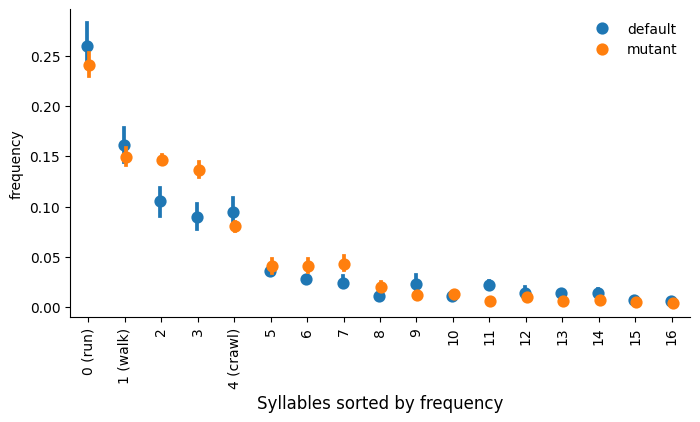

In [6]:
kpms.plot_syll_stats_with_sem(
    stats_df, project_dir, model_name,
    plot_sig=True,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='frequency', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group='a',   # name of the control group for statistical testing
    exp_group='b',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size    
    groups=stats_df['group'].unique(), # groups to be plotted
);

### Transition matrices
Generate heatmaps showing the transition frequencies between syllables.

Group(s): default, mutant
Saved figure to ../../testing/demo_project/2023_08_01-10_16_25/figures/transition_matrices.png


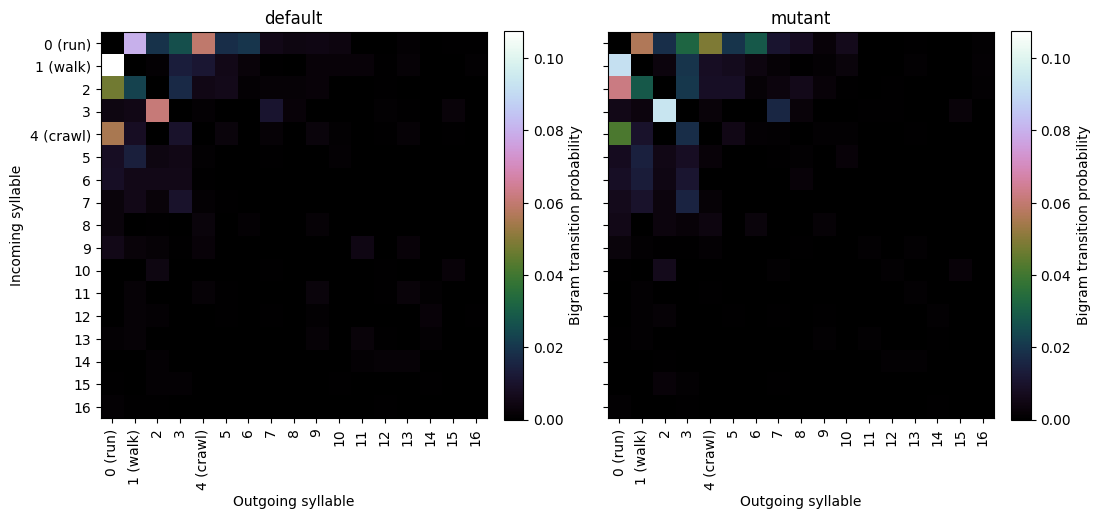

In [7]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005 # minimum syllable frequency to include
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=True # label syllables by index (False) or index and name (True)
)

### Syllable Transition Graph
Render transition rates in graph form, where nodes represent syllables and edges represent transitions between syllables, with edge width showing transition rate for each pair of syllables (secifically the max of the two transition rates in each direction).

Saved figure to ../../testing/demo_project/2023_08_01-10_16_25/figures/transition_graphs.png


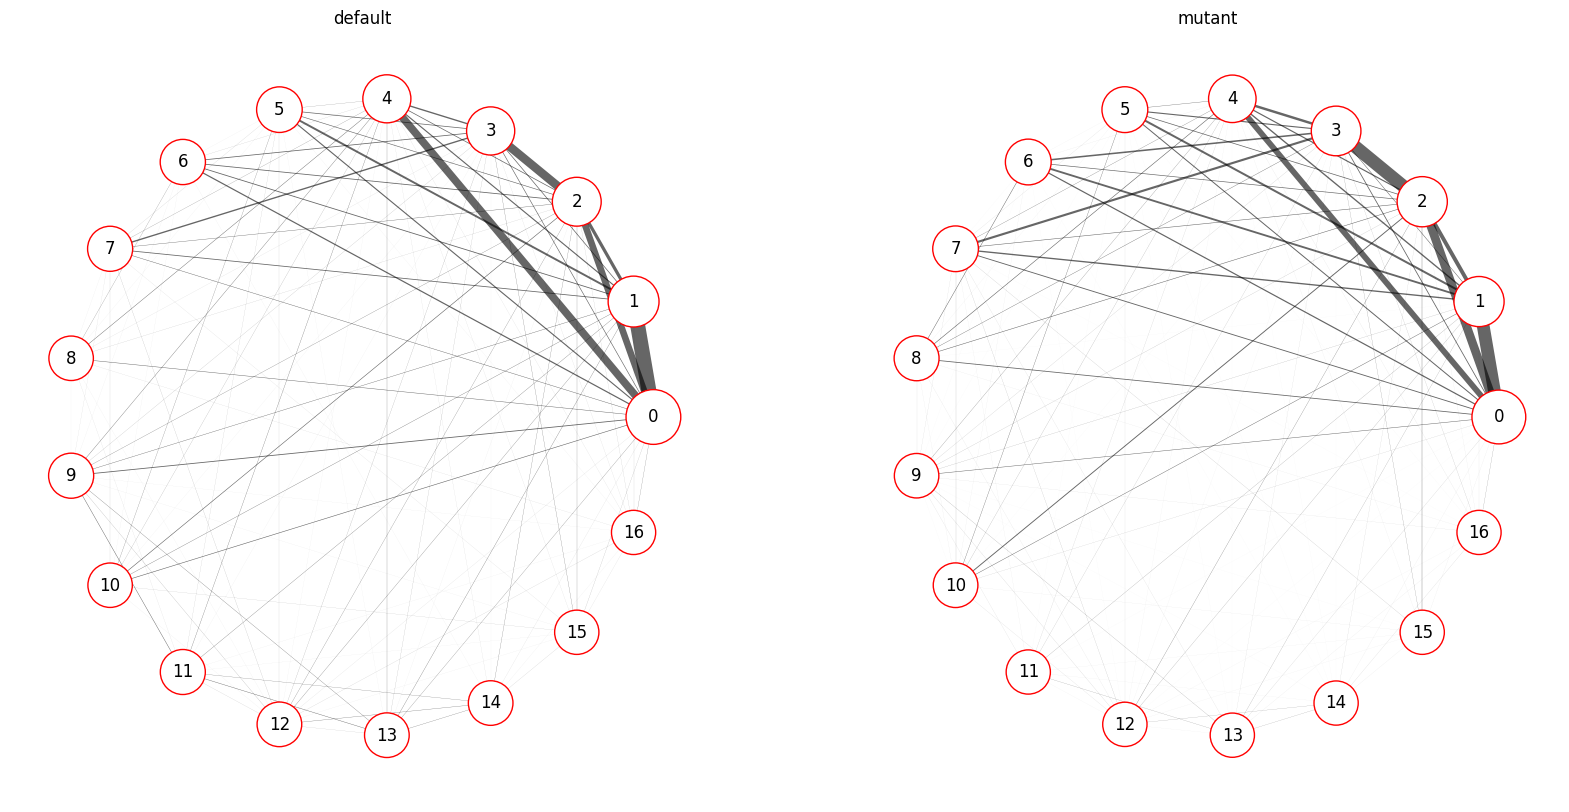

In [8]:
# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

Saved figure to ../../testing/demo_project/2023_08_01-10_16_25/figures/transition_graphs_diff.png


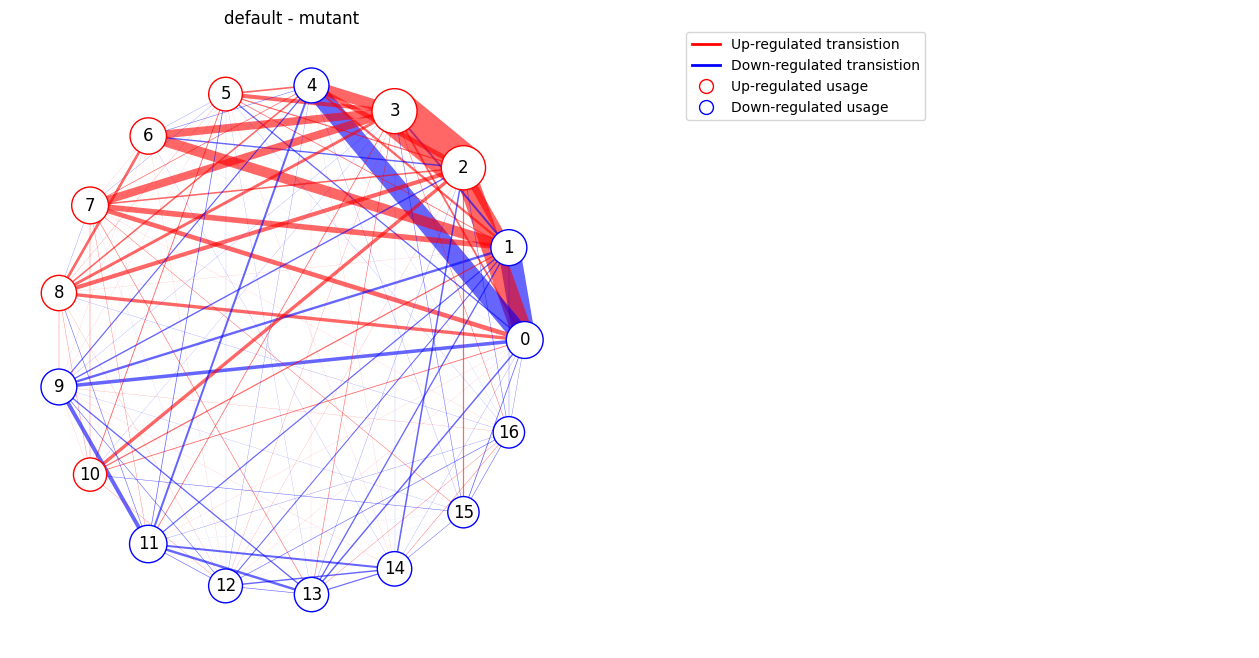

In [9]:
# Generate a difference-graph for each pair of groups.

kpms.plot_transition_graph_difference(project_dir, model_name, 
                                      groups, trans_mats, usages, syll_include, 
                                      layout='circular') # transition graph layout ("circular" or "spring")